In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200)

In [2]:
#What is the proportion of coffee drinkers in the sample? What is the proportion of individuals that don't drink coffee?

# Proportion person who drinks coffee.
prop_true_coffee = sum(coffee_red.drinks_coffee)/len(coffee_red.drinks_coffee)

# Print the proportion
print("Proportion of Coffee Drinkers: ", prop_true_coffee)
print("Proportion of Non Coffee Drinkers: ", 1 - prop_true_coffee)

Proportion of Coffee Drinkers:  0.595
Proportion of Non Coffee Drinkers:  0.405


In [3]:
# Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?
# Average Height of Coffee Drinkers
hgt_avg_coff_drinkers = coffee_red[coffee_red.drinks_coffee].height.mean()

# Average Height of Non Coffee Drinkers
hgt_avg_non_coff_drinkers = coffee_red[np.logical_not(coffee_red.drinks_coffee)].height.mean()

print("Average Height of Coffee Drinkers:",hgt_avg_coff_drinkers)
print("Average Height of Non Coffee Drinkers:",hgt_avg_non_coff_drinkers)

Average Height of Coffee Drinkers: 68.1196299087395
Average Height of Non Coffee Drinkers: 66.78492279913578


In [4]:
# Proportion of full population
sum(coffee_full.drinks_coffee)/len(coffee_full.drinks_coffee)

0.589778076664425

In [5]:
#Simulate 200 "new" individuals from your original sample of 200. What are the proportion of coffee drinkers in your bootstrap sample? How about individuals that don't drink coffee?
# Resampling the coffee_red using the bootstrap concept (replace = True)
coffee_bts = coffee_red.sample(200, replace = True)

In [6]:
sum(coffee_bts.drinks_coffee)/len(coffee_bts.drinks_coffee)

0.605

In [7]:
#Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval. What do you notice about the sampling distribution of the mean in this example?
mean_height_10000 = []

for index in range(0,10000):
    coffee_bts = coffee_red.sample(200, replace = True)
    temp = coffee_bts[np.logical_not(coffee_bts.drinks_coffee)].height.mean()
    mean_height_10000.append(temp)

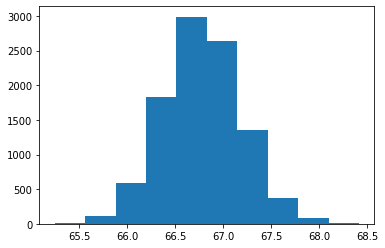

In [8]:
plt.hist(mean_height_10000);

In [9]:
# Interval Confidence
np.percentile(mean_height_10000, 2.5), np.percentile(mean_height_10000, 100 - 2.5)

(65.99291328120263, 67.58402738287397)

In [10]:
# Population mean of Non Coffee Drinkers.
coffee_full[np.logical_not(coffee_full.drinks_coffee)].height.mean()

66.4434077621148

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [15]:
# Printing the first 5 rows
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [16]:
#For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution
# Initializing a variable to store the differences.
diff_heights = []

# Loop to create 10,000 samples of 200.
for index in range(10000):
    # Sampling 200 "elements" of full_data.
    sample = full_data.sample(200, replace = True)

    # Coffee Drinkers
    avg_coffee_drinkers = sample[sample.drinks_coffee].height.mean()

    # Non Coffee Drinkers
    avg_non_coffee_drinkers = sample[np.logical_not(sample.drinks_coffee)].height.mean()
    
    # Difference of Heights
    diff = avg_coffee_drinkers - avg_non_coffee_drinkers
    
    # Append diff in the list.
    diff_heights.append(diff)

In [17]:
np.percentile(diff_heights, 0.5), np.percentile(diff_heights, 99.5)

(0.7804195542719816, 3.1064330971870584)

In [18]:
#For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21. Build a 99% confidence interval using your sampling distribution.
# Initializing a variable to store the differences.
diff_heights_age = []

# Loop to create 10,000 samples of 200.
for index in range(10000):
    # Sampling 200 "elements" of full_data.
    sample = full_data.sample(200, replace = True)

    # Older than 21
    avg_older_drinkers = sample.query("age == '>=21'").height.mean()

    # Younger
    avg_young_drinkers = sample.query("age == '<21'").height.mean()
    
    # Difference of Heights
    diff = avg_older_drinkers - avg_young_drinkers
    
    # Append diff in the list.
    diff_heights_age.append(diff)

In [19]:
np.percentile(diff_heights_age, 0.5), np.percentile(diff_heights_age, 99.5)

(2.9325260713362917, 4.8286362663899745)

In [20]:
#For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old. Using your sampling distribution, build a 95% confidence interval. 
# Initializing a variable to store the differences.
diff_heights_young_drinkers = []
avg_21_non_coffee_drinkers = []
avg_21_coffee_drinkers = []
diff_heights_young_drinkers2 = []

# Loop to create 10,000 samples of 200.
for index in range(10000):
    # Sampling 200 "elements" of full_data.
    sample = full_data.sample(200, replace = True)

    # Older than 21
    avg_young_coffee_drinkers = sample.query("age == '<21'").query("drinks_coffee == True").height.mean()

    # Younger
    avg_young_non_coffee_drinkers = sample.query("age == '<21'").query("drinks_coffee == False").height.mean()
    
    # Difference of Heights
    diff = avg_young_coffee_drinkers - avg_young_non_coffee_drinkers
    
    diff2 = avg_young_non_coffee_drinkers - avg_young_coffee_drinkers
    
    # Append diff in the list.
    diff_heights_young_drinkers.append(diff)
    avg_21_non_coffee_drinkers.append(avg_young_non_coffee_drinkers)
    avg_21_coffee_drinkers.append(avg_young_coffee_drinkers)
    diff_heights_young_drinkers2.append(diff2)

In [21]:
import seaborn as sns
import matplotlib.pylab as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


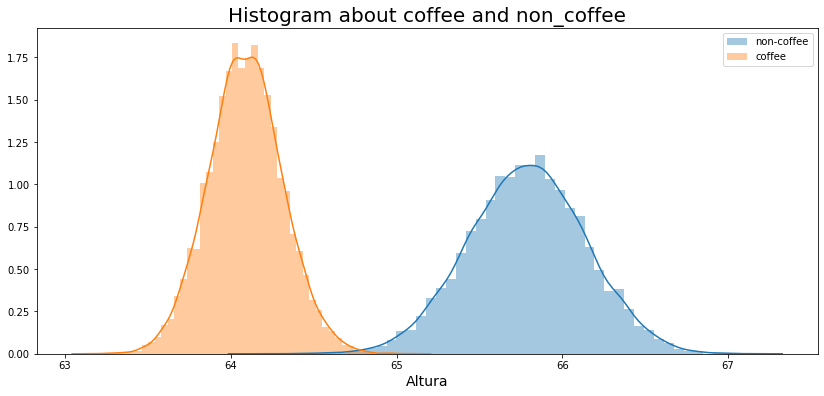

In [26]:
#sns.distplot(diff_heights_young_drinkers);
plt.figure(figsize = [14, 6])
sns.distplot(avg_21_non_coffee_drinkers);
sns.distplot(avg_21_coffee_drinkers);
plt.legend(['non-coffee','coffee']);
plt.title("Histogram about coffee and non_coffee", fontsize = 20);
plt.xlabel("Altura", fontsize = 14);

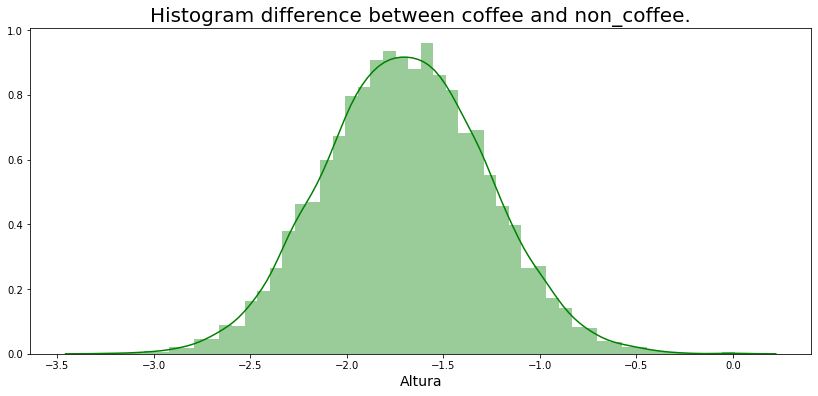

In [25]:
plt.figure(figsize = [14, 6])
sns.distplot(diff_heights_young_drinkers, color = 'green');
plt.title("Histogram difference between coffee and non_coffee.", fontsize = 20);
plt.xlabel("Altura", fontsize = 14);

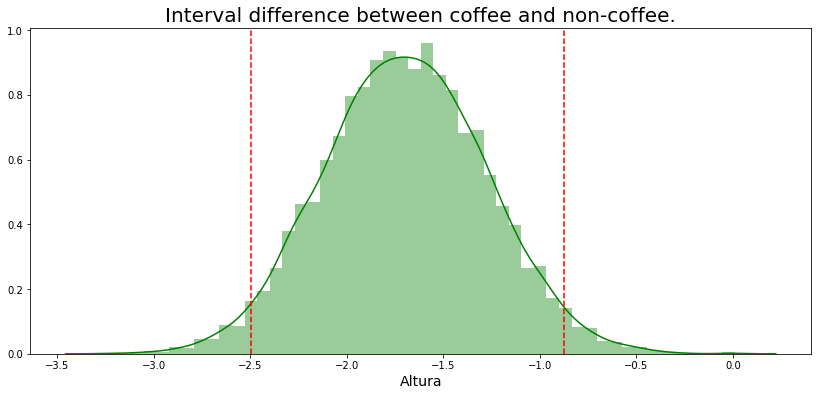

In [27]:
plt.figure(figsize = [14, 6])
sns.distplot(diff_heights_young_drinkers, color = 'green');
plt.title("Interval difference between coffee and non-coffee.", fontsize = 20);
plt.xlabel("Altura", fontsize = 14);
plt.axvline(x = np.percentile(diff_heights_young_drinkers, 2.5), color = 'r', linestyle = 'dashed');
plt.axvline(x = np.percentile(diff_heights_young_drinkers, 97.5), color = 'r', linestyle = 'dashed');

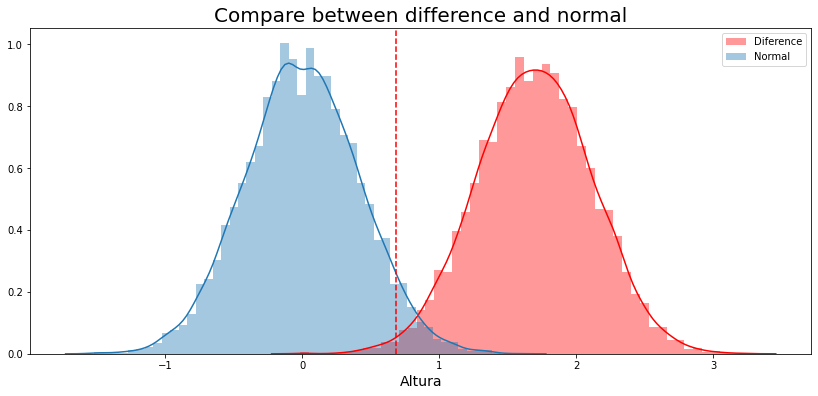

In [30]:
plt.figure(figsize = [14, 6])
sns.distplot(diff_heights_young_drinkers2, color = 'red');
df_normal = np.random.normal(0, np.std(diff_heights_young_drinkers), 10000)
sns.distplot(df_normal)
plt.legend(['Diference','Normal'])
plt.title("Compare between difference and normal", fontsize = 20);
plt.axvline(x = np.percentile(df_normal, 95.0), color = 'r', linestyle = 'dashed');
plt.xlabel("Altura", fontsize = 14);
plt.show()

In [31]:
(df_normal > np.mean(diff_heights_young_drinkers2)).mean()

0.0

In [32]:
np.percentile(diff_heights_young_drinkers, 2.5), np.percentile(diff_heights_young_drinkers, 97.5)

(-2.497223151081322, -0.875819156944543)

In [ ]:
#For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals over 21 years old. Using your sampling distribution, build a 95% confidence interval.


In [33]:
# Initializing a variable to store the differences.
diff_heights_older_drinkers = []

# Loop to create 10,000 samples of 200.
for index in range(10000):
    # Sampling 200 "elements" of full_data.
    sample = full_data.sample(200, replace = True)

    # Older than 21
    avg_old_coffee_drinkers = sample.query("age == '>=21'").query("drinks_coffee == True").height.mean()

    # Younger
    avg_old_non_coffee_drinkers = sample.query("age == '>=21'").query("drinks_coffee == False").height.mean()
    
    # Difference of Heights
    diff = avg_old_coffee_drinkers - avg_old_non_coffee_drinkers
    
    # Append diff in the list.
    diff_heights_older_drinkers.append(diff)

In [34]:
np.percentile(diff_heights_older_drinkers, 2.5), np.percentile(diff_heights_older_drinkers, 97.5)

(-3.291336265534895, -0.6341722295605856)

In [35]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


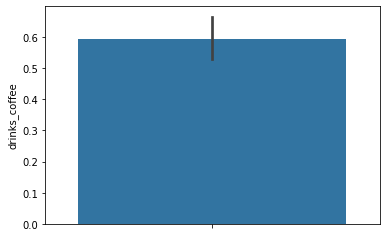

In [36]:
#barplot
sns.barplot(data = sample_data, y = 'drinks_coffee', hue = 'drinks_coffee')

In [38]:
#Thank You